In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')
print(f"Размер данных: {df.shape}")
print(f"Пропуски: {df.isnull().sum().sum()}")
print("Первые 5 строк данных:")
print(df.head())


Размер данных: (20758, 18)
Пропуски: 0
Первые 5 строк данных:
   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       

Создан новый признак: BMI
Среднее BMI: 30.24
Минимальное BMI: 12.87
Максимальное BMI: 55.00


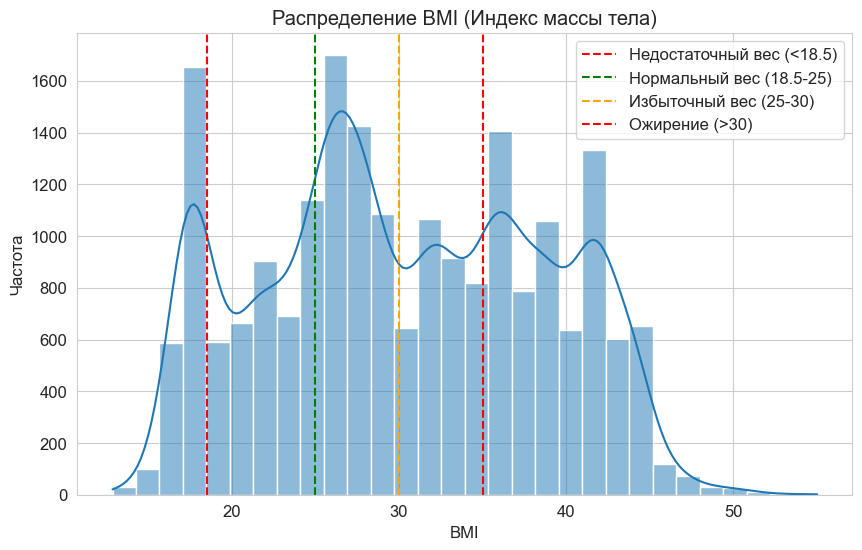

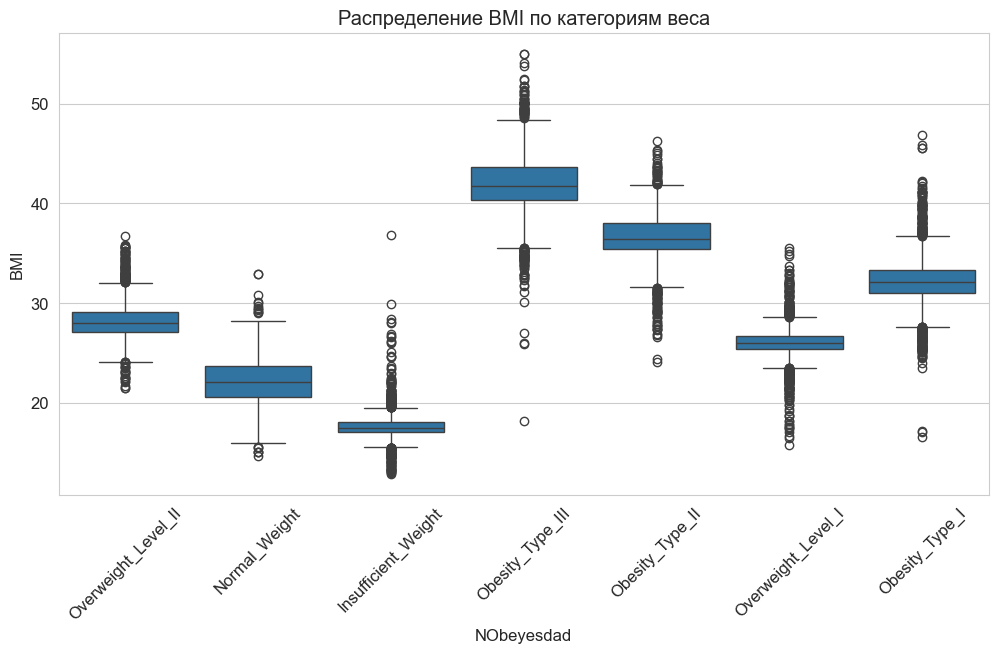

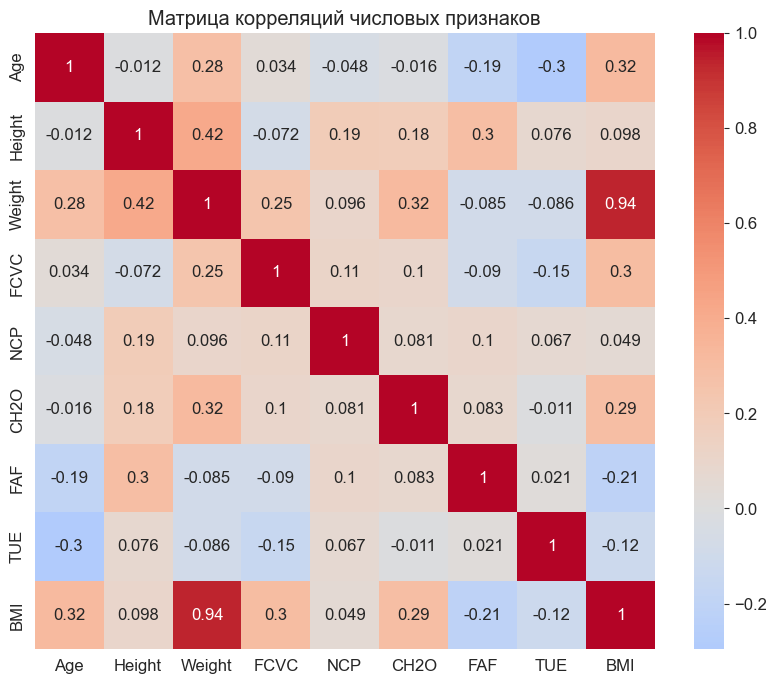

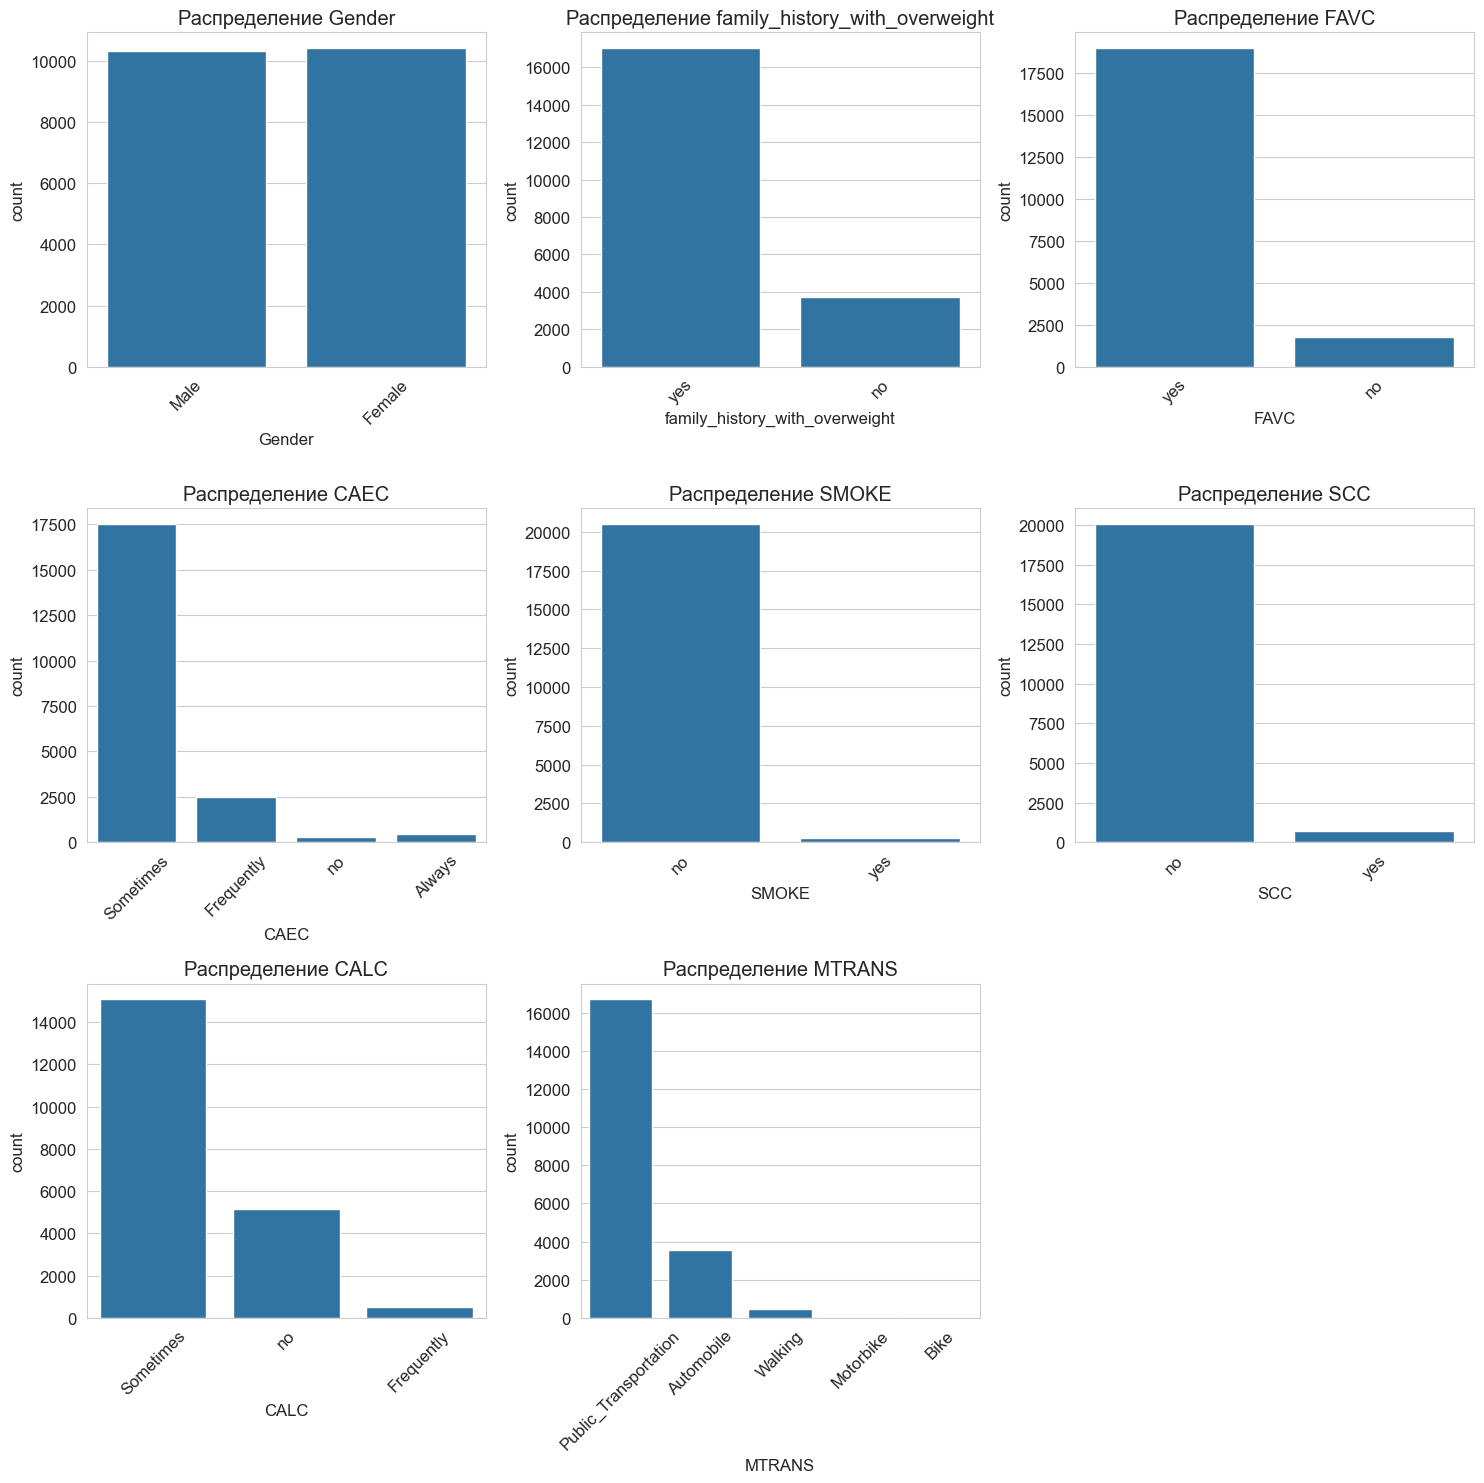

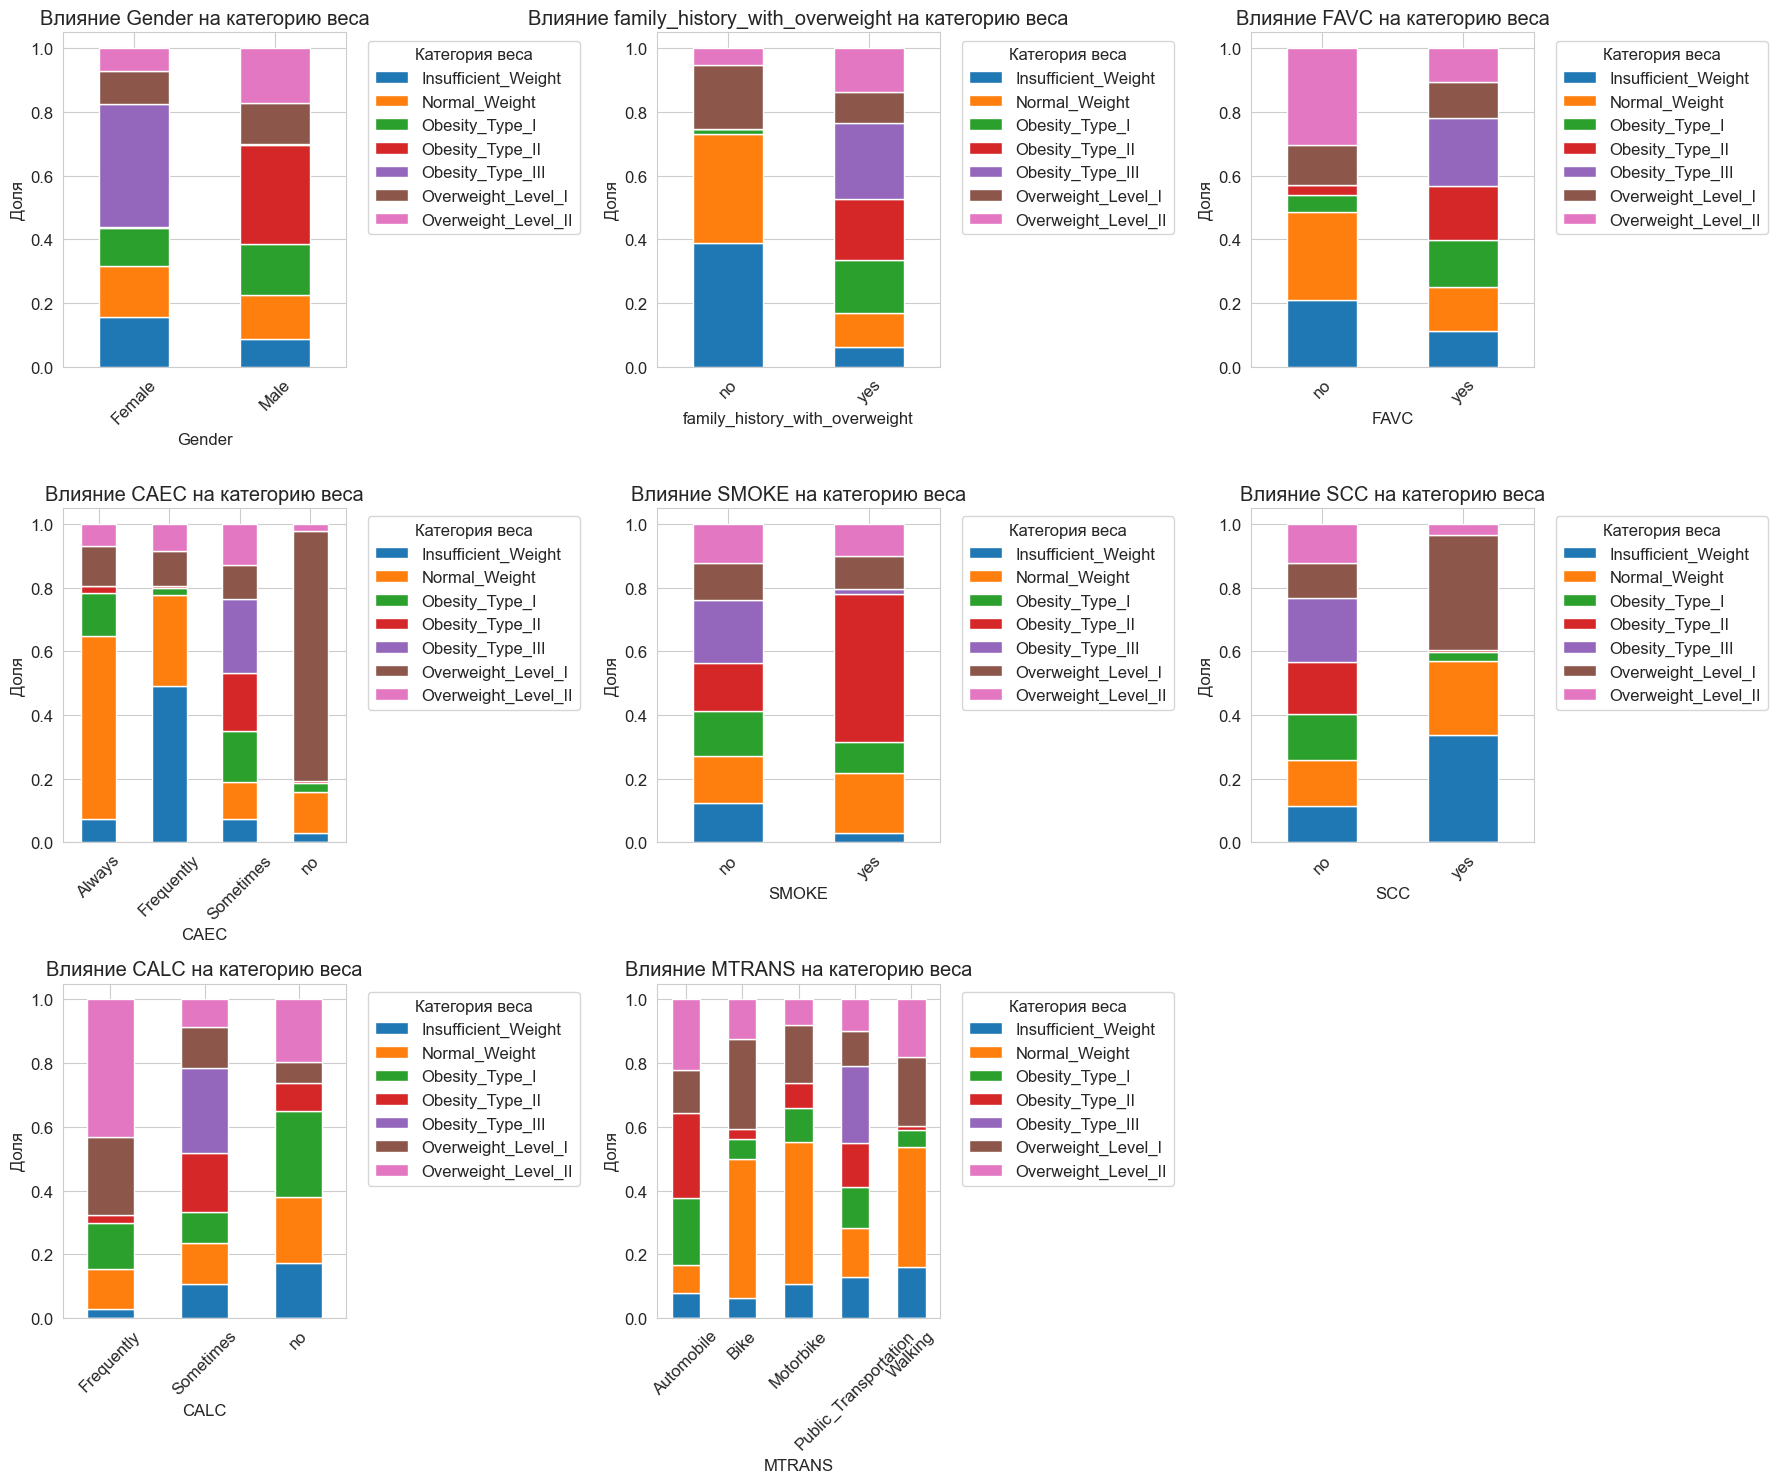

In [147]:
df_eda = df.copy()

# 1. Создадим новый признак - BMI (Индекс массы тела)
df_eda['BMI'] = df_eda['Weight'] / (df_eda['Height'] ** 2)
print("Создан новый признак: BMI")
print(f"Среднее BMI: {df_eda['BMI'].mean():.2f}")
print(f"Минимальное BMI: {df_eda['BMI'].min():.2f}")
print(f"Максимальное BMI: {df_eda['BMI'].max():.2f}")

# 2. Визуализируем распределение BMI
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['BMI'], bins=30, kde=True)
plt.title('Распределение BMI (Индекс массы тела)')
plt.xlabel('BMI')
plt.ylabel('Частота')
plt.axvline(x=18.5, color='r', linestyle='--', label='Недостаточный вес (<18.5)')
plt.axvline(x=25, color='g', linestyle='--', label='Нормальный вес (18.5-25)')
plt.axvline(x=30, color='orange', linestyle='--', label='Избыточный вес (25-30)')
plt.axvline(x=35, color='red', linestyle='--', label='Ожирение (>30)')
plt.legend()
plt.show()

# 3. Визуализируем взаимосвязь BMI с целевой переменной
plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='BMI', data=df_eda)
plt.title('Распределение BMI по категориям веса')
plt.xticks(rotation=45)
plt.show()


# 6. Анализ корреляций числовых признаков
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
correlation_matrix = df_eda[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций числовых признаков')
plt.show()

# 7. Анализ распределения категориальных признаков
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']

for idx, col in enumerate(categorical_cols):
    ax = axes[idx//3, idx%3]
    sns.countplot(x=col, data=df_eda, ax=ax)
    ax.set_title(f'Распределение {col}')
    ax.tick_params(axis='x', rotation=45)

for idx in range(len(categorical_cols), 9):
    axes[idx//3, idx%3].set_visible(False)

plt.tight_layout()
plt.show()

# 8. Анализ взаимосвязи категориальных признаков с целевой переменной
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
for idx, col in enumerate(categorical_cols):
    ax = axes[idx//3, idx%3]
    crosstab = pd.crosstab(df_eda[col], df_eda['NObeyesdad'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Влияние {col} на категорию веса')
    ax.set_xlabel(col)
    ax.set_ylabel('Доля')
    ax.legend(title='Категория веса', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=45)

for idx in range(len(categorical_cols), 9):
    axes[idx//3, idx%3].set_visible(False)

plt.tight_layout()
plt.show()



In [148]:
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

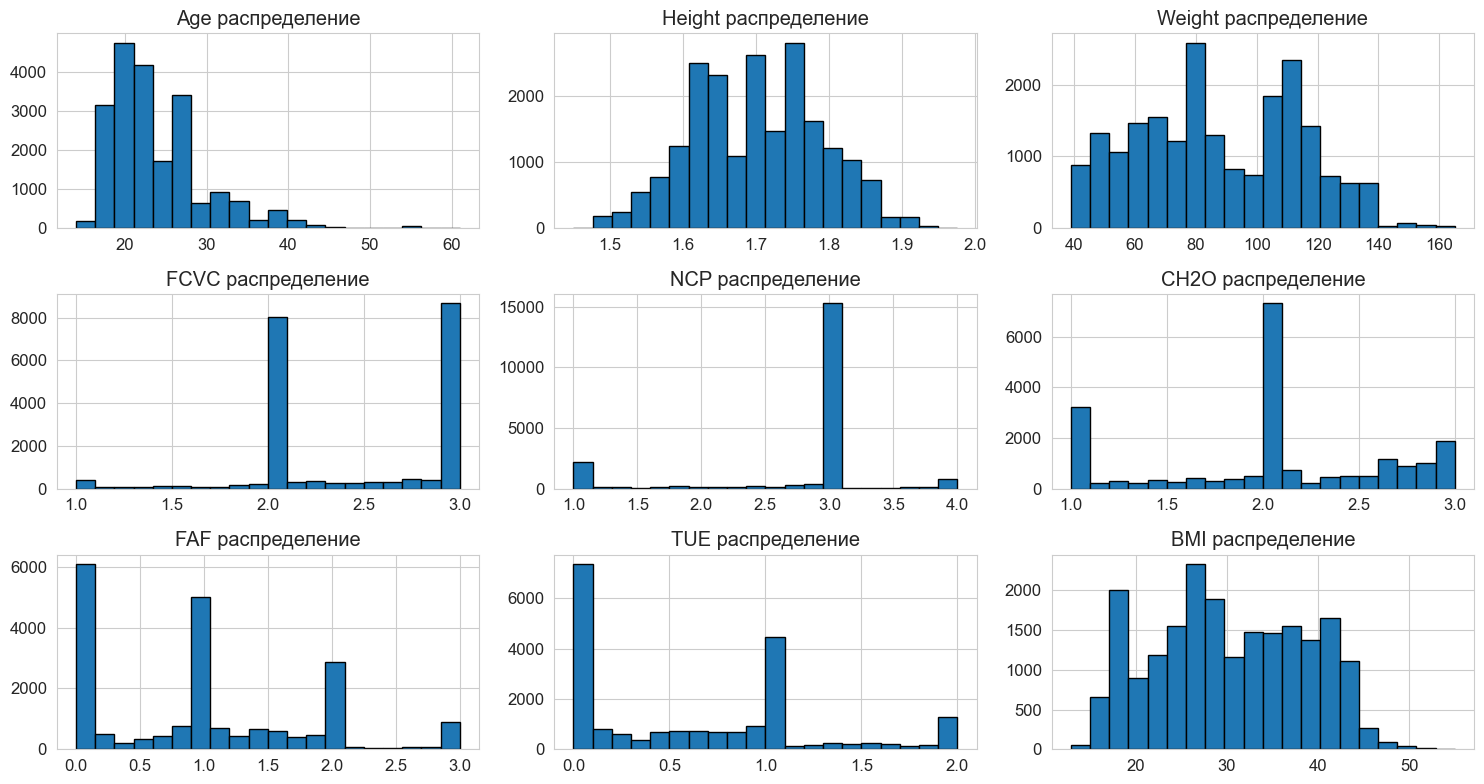

In [149]:
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE','BMI']
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
for idx, col in enumerate(numeric_cols):
    ax = axes[idx//3, idx%3]
    df[col].hist(ax=ax, bins=20, edgecolor='black')
    ax.set_title(f'{col} распределение')
plt.tight_layout()
plt.show()



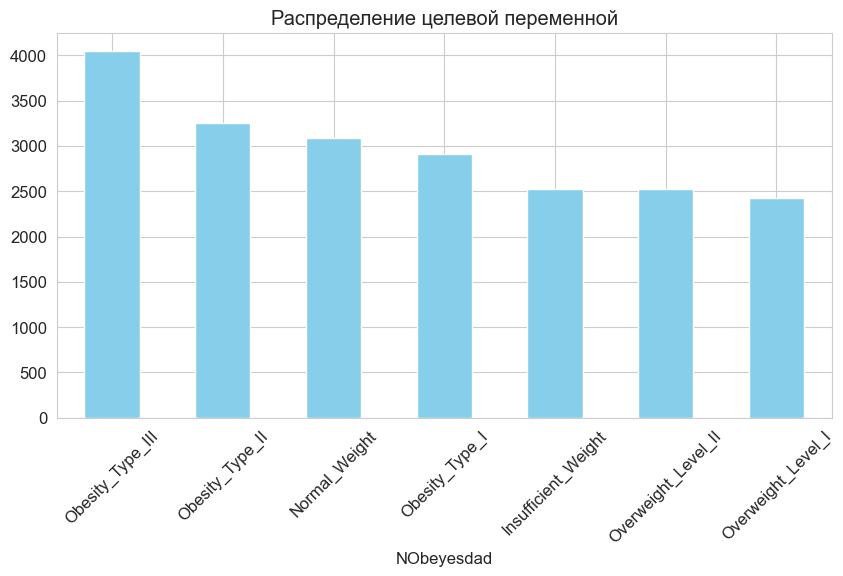


🎯 Целевая переменная (7 классов):
NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64
• Классы несбалансированы - важна метрика F1-macro


In [150]:
# 2. Анализ целевой переменной
plt.figure(figsize=(10, 5))
df['NObeyesdad'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Распределение целевой переменной')
plt.xticks(rotation=45)
plt.show()

print(f"\n🎯 Целевая переменная (7 классов):")
print(df['NObeyesdad'].value_counts())
print("• Классы несбалансированы - важна метрика F1-macro")

In [151]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder


X = df[numeric_cols + categorical_cols].copy() 
y = df['NObeyesdad']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y_encoded, 
    test_size=0.2, 
    random_state=42,
    stratify=y_encoded  
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



In [123]:
X_train

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
4515,22.000000,1.710000,90.000000,2.000000,1.000000,2.000000,1.000000,2.000000,30.778701,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
7949,41.000000,1.640000,77.000000,3.000000,1.000000,2.000000,0.000000,0.000000,28.628792,Female,yes,yes,Sometimes,no,no,Sometimes,Automobile
20677,18.000000,1.800000,56.000000,2.000000,4.000000,2.000000,2.000000,1.000000,17.283951,Male,yes,yes,Frequently,no,no,no,Automobile
18079,18.000000,1.700000,85.000000,2.000000,3.000000,2.000000,2.000000,1.000000,29.411765,Male,yes,yes,Frequently,no,no,Frequently,Public_Transportation
5129,22.735328,1.849425,121.657979,2.352323,2.699971,2.357978,1.684582,0.739609,35.568631,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,23.000000,1.550000,50.000000,2.000000,1.000000,1.000000,0.000000,1.000000,20.811655,Female,no,yes,Sometimes,no,no,Sometimes,Public_Transportation
14825,34.204408,1.662978,79.863546,2.000000,1.851088,1.074048,0.883542,0.000000,28.878563,Female,yes,yes,Sometimes,no,no,Sometimes,Automobile
3584,21.000000,1.580000,49.000000,2.000000,3.000000,2.000000,2.000000,1.000000,19.628265,Female,yes,yes,Sometimes,no,no,no,Public_Transportation
12333,37.063599,1.559567,77.133220,2.000000,2.948721,1.526313,0.000000,0.000000,31.712712,Female,yes,yes,Sometimes,no,no,Sometimes,Automobile


In [152]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np

binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
ordinal_cols = ['CAEC', 'CALC']
nominal_cols = ['MTRANS']
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

caec_order = [['no', 'Sometimes', 'Frequently', 'Always']]
calc_order = [['no', 'Sometimes', 'Frequently']]

preprocessor = ColumnTransformer([
    ('binary', OneHotEncoder(drop='first'), binary_cols),
    ('caec', OrdinalEncoder(categories=caec_order), ['CAEC']),
    ('calc', OrdinalEncoder(categories=calc_order), ['CALC']),
    ('nominal', OneHotEncoder(), nominal_cols),
    ('numeric', StandardScaler(), numeric_cols)
])



baseline_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy='stratified', random_state=42))
])

baseline_pipeline.fit(X_train_all, y_train_all)
y_pred_baseline = baseline_pipeline.predict(X_test_all)
baseline_f1 = f1_score(y_test_all, y_pred_baseline, average='macro')

print(f"\nBaseline модель построена")
print(f"   Стратегия: 'stratified' (предсказывает в соответствии с распределением классов)")
print(f"   F1-Score (macro): {baseline_f1:.4f}")
print(f"   Точность (accuracy): {np.mean(y_pred_baseline == y_test):.4f}")

print("\n Распределение предсказаний Baseline:")
unique, counts = np.unique(y_pred_baseline, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"   {cls}: {count} предсказаний ({count/len(y_pred_baseline)*100:.1f}%)")

print("\n Baseline будет использоваться для сравнения с более сложными моделями")


Baseline модель построена
   Стратегия: 'stratified' (предсказывает в соответствии с распределением классов)
   F1-Score (macro): 0.1442
   Точность (accuracy): 0.1481

 Распределение предсказаний Baseline:
   0: 499 предсказаний (12.0%)
   1: 636 предсказаний (15.3%)
   2: 563 предсказаний (13.6%)
   3: 615 предсказаний (14.8%)
   4: 816 предсказаний (19.7%)
   5: 495 предсказаний (11.9%)
   6: 528 предсказаний (12.7%)

 Baseline будет использоваться для сравнения с более сложными моделями


In [162]:


from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time

def search_params(X_train, y_train, X_test, y_test, without_gender=False):
    if (without_gender):
        binary_cols = [ 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
    else:
        binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
    ordinal_cols = ['CAEC', 'CALC']
    nominal_cols = ['MTRANS']
    numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

    caec_order = [['no', 'Sometimes', 'Frequently', 'Always']]
    calc_order = [['no', 'Sometimes', 'Frequently']]

    preprocessor = ColumnTransformer([
        ('binary', OneHotEncoder(drop='first'), binary_cols),
        ('caec', OrdinalEncoder(categories=caec_order), ['CAEC']),
        ('calc', OrdinalEncoder(categories=calc_order), ['CALC']),
        ('nominal', OneHotEncoder(), nominal_cols),
        ('numeric', StandardScaler(), numeric_cols)
    ])
    print("\n" + "=" * 80)
    print("2. ТЕСТИРОВАНИЕ И СРАВНЕНИЕ МОДЕЛЕЙ С ГИПЕРПАРАМЕТРИЗАЦИЕЙ")
    print("=" * 80)
    models_config = [
        {
            'name': 'SVM',
            'model': SVC(random_state=42, probability=True),
            'params': {
                'classifier__C': [0.1, 1, 10],
                'classifier__kernel': ['linear', 'rbf'],
                'classifier__gamma': ['scale', 'auto']
            },
            'search_type': 'grid'
        },
        {
            'name': 'Random Forest',
            'model': RandomForestClassifier(random_state=42),
            'params': {
                'classifier__n_estimators': [100, 200, 300],
                'classifier__max_depth': [10, 20, None],
                'classifier__min_samples_split': [2, 5, 10]
            },
            'search_type': 'grid'
        },
        {
            'name': 'Gradient Boosting (sklearn)',
            'model': GradientBoostingClassifier(random_state=42),
            'params': {
                'classifier__n_estimators': [100, 200],
                'classifier__learning_rate': [0.01, 0.1, 0.2],
                'classifier__max_depth': [3, 7]
            },
            'search_type': 'grid'
        }
    ]

    result = []

    print("Гиперпараметризация 3 моделей из разных семейств:")
    print("1. SVM - линейные модели/ядра")
    print("2. Random Forest - ансамбль деревьев (bagging)")
    print("3. Gradient Boosting - ансамбль деревьев (boosting)")
    print()

    for config in models_config:
        print(f"\n ГИПЕРПАРАМЕТРИЗАЦИЯ {config['name']}:")
        
        # Создаем пайплайн
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', config['model'])
        ])
        

        search = GridSearchCV(
            pipeline, 
            config['params'],
            cv=5,
            scoring='f1_macro',
            n_jobs=-1,
            verbose=1
            )

        

        start_time = time.time()
        search.fit(X_train, y_train)
        train_time = time.time() - start_time
        
        y_pred = search.best_estimator_.predict(X_test)
        test_f1 = f1_score(y_test, y_pred, average='macro')
        test_accuracy = np.mean(y_pred == y_test)
        
        result.append({
            'Model': config['name'],
            'Best_Params': search.best_params_,
            'CV_F1_Mean': search.best_score_,
            'Test_F1': test_f1,
            'Test_Accuracy': test_accuracy,
            'Train_Time': train_time
        })
        
        print(f"   Лучшие параметры: {search.best_params_}")
        print(f"   Лучший CV F1-Score: {search.best_score_:.4f}")
        print(f"   Тестовый F1-Score: {test_f1:.4f}")
        print(f"   Время обучения: {train_time:.2f} сек")

    return result

In [158]:
results = search_params(X_train_all,y_train_all,X_test_all, y_test_all)


2. ТЕСТИРОВАНИЕ И СРАВНЕНИЕ МОДЕЛЕЙ С ГИПЕРПАРАМЕТРИЗАЦИЕЙ
Гиперпараметризация 3 моделей из разных семейств:
1. SVM - линейные модели/ядра
2. Random Forest - ансамбль деревьев (bagging)
3. Gradient Boosting - ансамбль деревьев (boosting)


 ГИПЕРПАРАМЕТРИЗАЦИЯ SVM:
Fitting 5 folds for each of 12 candidates, totalling 60 fits
   Лучшие параметры: {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
   Лучший CV F1-Score: 0.8653
   Тестовый F1-Score: 0.8763
   Время обучения: 145.01 сек

 ГИПЕРПАРАМЕТРИЗАЦИЯ Random Forest:
Fitting 5 folds for each of 27 candidates, totalling 135 fits
   Лучшие параметры: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
   Лучший CV F1-Score: 0.8893
   Тестовый F1-Score: 0.8927
   Время обучения: 68.04 сек

 ГИПЕРПАРАМЕТРИЗАЦИЯ Gradient Boosting (sklearn):
Fitting 5 folds for each of 18 candidates, totalling 90 fits
   Лучшие параметры: {'classifier__learning_rate': 0.1, 'clas


4. АНАЛИЗ КОМПРОМИССА 'КАЧЕСТВО vs. СЛОЖНОСТЬ'

📊 СРАВНИТЕЛЬНАЯ ТАБЛИЦА ВСЕХ МОДЕЛЕЙ:
                      Model  Test_F1  Test_Accuracy  Train_Time
                        SVM 0.876348       0.889210  105.948565
              Random Forest 0.892748       0.903661   46.482533
Gradient Boosting (sklearn) 0.896038       0.906310  484.360259


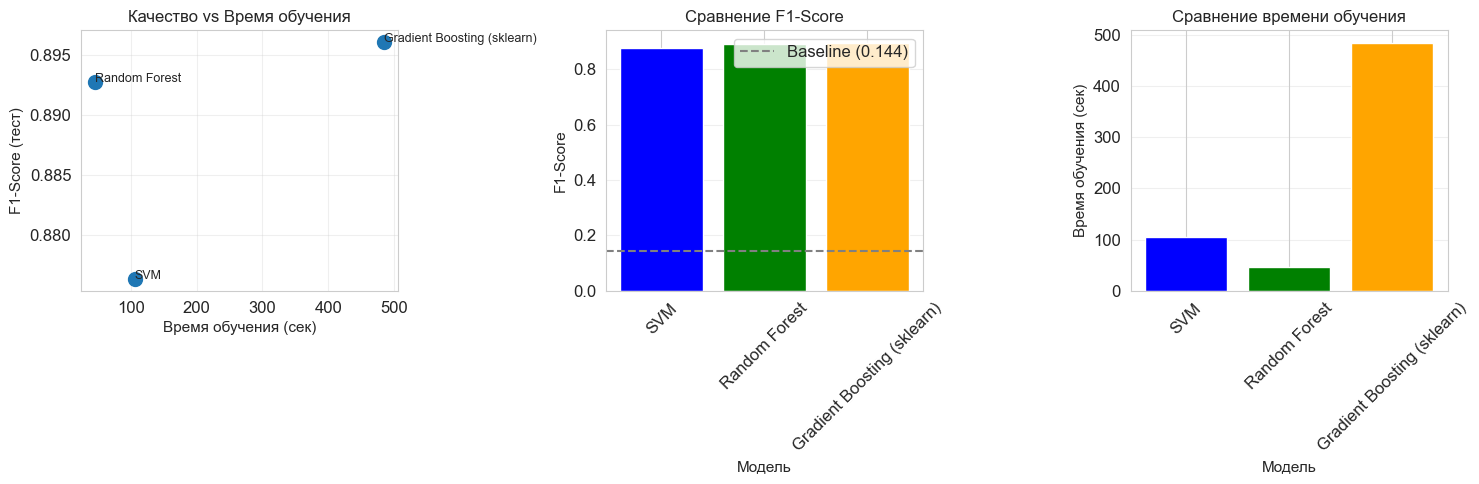


🔍 АНАЛИЗ КОМПРОМИССА КАЧЕСТВО-СЛОЖНОСТЬ:
1. Random Forest:
   • F1-Score: 0.8927
   • Время обучения: 46.5 сек
   • Сложность: средняя, хороший баланс качества и скорости

2. Gradient Boosting:
   • F1-Score: 0.8960
   • Время обучения: 484.4 сек
   • Сложность: высокая, требует больше времени на обучение

3. SVM:
   • F1-Score: 0.8763
   • Время обучения: 105.9 сек
   • Сложность: низкая, быстро обучается, но качество ниже


In [135]:
print("\n" + "=" * 80)
print("4. АНАЛИЗ КОМПРОМИССА 'КАЧЕСТВО vs. СЛОЖНОСТЬ'")
print("=" * 80)

# Создаем сравнительную таблицу
import pandas as pd

comparison_df = pd.DataFrame(results)
print("\n📊 СРАВНИТЕЛЬНАЯ ТАБЛИЦА ВСЕХ МОДЕЛЕЙ:")
print(comparison_df[['Model', 'Test_F1', 'Test_Accuracy', 'Train_Time']].to_string(index=False))

# Визуализация компромисса
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. F1-Score vs Время обучения
models = comparison_df['Model'].values
f1_scores = comparison_df['Test_F1'].values
train_times = comparison_df['Train_Time'].values

axes[0].scatter(train_times, f1_scores, s=100)
for i, model in enumerate(models):
    axes[0].annotate(model, (train_times[i], f1_scores[i]), fontsize=9)
axes[0].set_xlabel('Время обучения (сек)', fontsize=11)
axes[0].set_ylabel('F1-Score (тест)', fontsize=11)
axes[0].set_title('Качество vs Время обучения', fontsize=12)
axes[0].grid(True, alpha=0.3)

# 2. Сравнение F1-Score
axes[1].bar(models, f1_scores, color=['blue', 'green', 'orange', 'red'])
axes[1].axhline(y=baseline_f1, color='gray', linestyle='--', label=f'Baseline ({baseline_f1:.3f})')
axes[1].set_xlabel('Модель', fontsize=11)
axes[1].set_ylabel('F1-Score', fontsize=11)
axes[1].set_title('Сравнение F1-Score', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# 3. Время обучения моделей
axes[2].bar(models, train_times, color=['blue', 'green', 'orange', 'red'])
axes[2].set_xlabel('Модель', fontsize=11)
axes[2].set_ylabel('Время обучения (сек)', fontsize=11)
axes[2].set_title('Сравнение времени обучения', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Анализ сложности моделей
print("\n🔍 АНАЛИЗ КОМПРОМИССА КАЧЕСТВО-СЛОЖНОСТЬ:")
print("1. Random Forest:")
print(f"   • F1-Score: {comparison_df.loc[1, 'Test_F1']:.4f}")
print(f"   • Время обучения: {comparison_df.loc[1, 'Train_Time']:.1f} сек")
print(f"   • Сложность: средняя, хороший баланс качества и скорости")

print("\n2. Gradient Boosting:")
print(f"   • F1-Score: {comparison_df.loc[2, 'Test_F1']:.4f}")
print(f"   • Время обучения: {comparison_df.loc[2, 'Train_Time']:.1f} сек")
print(f"   • Сложность: высокая, требует больше времени на обучение")

print("\n3. SVM:")
print(f"   • F1-Score: {comparison_df.loc[0, 'Test_F1']:.4f}")
print(f"   • Время обучения: {comparison_df.loc[0, 'Train_Time']:.1f} сек")
print(f"   • Сложность: низкая, быстро обучается, но качество ниже")



In [130]:
df_male=df[df['Gender'].isin(['Male'])]
df_female=df[df['Gender'].isin(['Female'])]

In [133]:
categorical_cols = ['family_history_with_overweight', 'FAVC', 'CAEC', 
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']
X_male = df_male[numeric_cols + categorical_cols].copy() 
y_male = df_male['NObeyesdad']
X_female = df_female[numeric_cols + categorical_cols].copy() 
y_female = df_female['NObeyesdad']

In [170]:
le = LabelEncoder()
y_encoded_male = le.fit_transform(y_male)
y_encoded_female = le.fit_transform(y_female)
X_train_male,  X_test_male,y_train_male, y_test_male = train_test_split(X_male, y_encoded_male,
    test_size=0.2, 
    random_state=42,
    stratify=y_encoded_male  
)
X_train_female,  X_test_female,y_train_female, y_test_female = train_test_split(X_female, y_encoded_female,
    test_size=0.2, 
    random_state=42,
    stratify=y_encoded_female  
)

In [171]:
X_train_male

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
2995,17.764764,1.700000,85.316125,2.995599,3.019574,2.568157,1.000000,0.786609,29.521151,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
20441,20.000000,1.750000,75.000000,2.000000,3.000000,3.000000,1.000000,1.000000,24.489796,yes,yes,Always,no,no,Sometimes,Public_Transportation
15986,28.824194,1.761008,113.774198,1.264234,3.000000,2.061062,1.097905,0.001330,36.687754,yes,yes,Sometimes,no,no,Sometimes,Automobile
17502,34.000000,1.750000,100.000000,2.000000,1.000000,2.000000,2.000000,0.000000,32.653061,yes,yes,Sometimes,no,no,no,Automobile
2443,23.365041,1.774644,105.000576,2.000000,3.000000,2.627569,1.000000,1.000000,33.340276,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5679,32.501143,1.750000,120.000000,2.631650,3.000000,2.045069,1.917383,0.000000,39.183673,yes,yes,Sometimes,no,no,no,Automobile
6754,18.000000,1.800000,60.000000,2.000000,3.000000,3.000000,1.000000,1.000000,18.518519,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
687,18.000000,1.750000,70.000000,2.000000,3.000000,2.000000,1.000000,0.000000,22.857143,yes,yes,Sometimes,no,no,no,Public_Transportation
3017,23.000000,1.750000,83.000000,3.000000,3.000000,2.000000,2.000000,1.000000,27.102041,yes,no,Frequently,no,no,Sometimes,Public_Transportation


In [172]:
y_train_male

array([6, 5, 3, ..., 1, 6, 6], shape=(8268,))

In [173]:
results_male = search_params(X_train_male,y_train_male,X_test_male, y_test_male, without_gender=True)


2. ТЕСТИРОВАНИЕ И СРАВНЕНИЕ МОДЕЛЕЙ С ГИПЕРПАРАМЕТРИЗАЦИЕЙ
Гиперпараметризация 3 моделей из разных семейств:
1. SVM - линейные модели/ядра
2. Random Forest - ансамбль деревьев (bagging)
3. Gradient Boosting - ансамбль деревьев (boosting)


 ГИПЕРПАРАМЕТРИЗАЦИЯ SVM:
Fitting 5 folds for each of 12 candidates, totalling 60 fits
   Лучшие параметры: {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
   Лучший CV F1-Score: 0.7533
   Тестовый F1-Score: 0.7204
   Время обучения: 58.20 сек

 ГИПЕРПАРАМЕТРИЗАЦИЯ Random Forest:
Fitting 5 folds for each of 27 candidates, totalling 135 fits
   Лучшие параметры: {'classifier__max_depth': 20, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
   Лучший CV F1-Score: 0.7736
   Тестовый F1-Score: 0.7430
   Время обучения: 27.73 сек

 ГИПЕРПАРАМЕТРИЗАЦИЯ Gradient Boosting (sklearn):
Fitting 5 folds for each of 12 candidates, totalling 60 fits
   Лучшие параметры: {'classifier__learning_rate': 0.1, 'classi

In [174]:
results_female = search_params(X_train_female,y_train_female,X_test_female, y_test_female, True)


2. ТЕСТИРОВАНИЕ И СРАВНЕНИЕ МОДЕЛЕЙ С ГИПЕРПАРАМЕТРИЗАЦИЕЙ
Гиперпараметризация 3 моделей из разных семейств:
1. SVM - линейные модели/ядра
2. Random Forest - ансамбль деревьев (bagging)
3. Gradient Boosting - ансамбль деревьев (boosting)


 ГИПЕРПАРАМЕТРИЗАЦИЯ SVM:
Fitting 5 folds for each of 12 candidates, totalling 60 fits
   Лучшие параметры: {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
   Лучший CV F1-Score: 0.7182
   Тестовый F1-Score: 0.7135
   Время обучения: 19.43 сек

 ГИПЕРПАРАМЕТРИЗАЦИЯ Random Forest:
Fitting 5 folds for each of 27 candidates, totalling 135 fits
   Лучшие параметры: {'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
   Лучший CV F1-Score: 0.7470
   Тестовый F1-Score: 0.7464
   Время обучения: 23.35 сек

 ГИПЕРПАРАМЕТРИЗАЦИЯ Gradient Boosting (sklearn):
Fitting 5 folds for each of 12 candidates, totalling 60 fits
   Лучшие параметры: {'classifier__learning_rate': 0.1, 'clas